Setup 
 

In [15]:
import numpy as np

np.random.seed(seed=12)  ## for reproducibility
dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  ## dummy data
y = np.random.binomial(1, 0.5, 2000)  ## dummy target variable


numpy.ndarray

In [16]:
dataset

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

visualize sparse matix

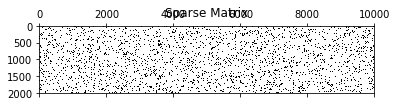

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.spy(dataset)
plt.title("Sparse Matrix");

visualize dense matrix

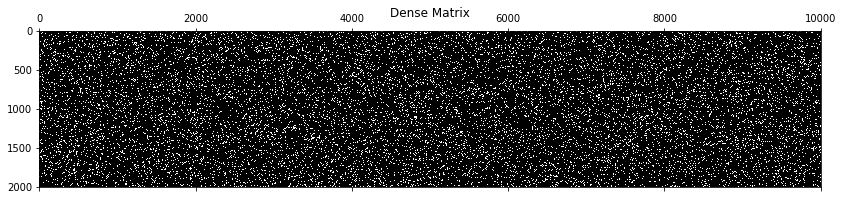

In [6]:
np.random.seed(seed=43)
plt.figure(figsize=(14,12))
plt.spy(np.random.binomial(1, 0.9, 20000000).reshape(2000,10000))
plt.title("Dense Matrix");

transform to Scipy's CSR

In [7]:
from scipy.sparse import csr_matrix
sparse_dataset = csr_matrix(dataset)

visualize Compression

Text(0.5,1,'Compression')

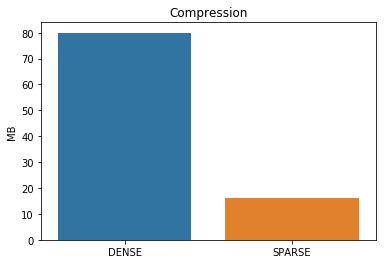

In [8]:
import seaborn as sns

dense_size = np.array(dataset).nbytes/1e6
sparse_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

sns.barplot(['DENSE', 'SPARSE'], [dense_size, sparse_size])
plt.ylabel('MB')
plt.title('Compression')

Computation time

1) Naive Bayes

In [11]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB(binarize=None)
dense_time=%timeit nb.fit(dataset, y)
sparse_time=%timeit nb.fit(sparse_dataset, y)

189 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
31.7 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


2)Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=99)
%timeit lr.fit(dataset, y)
%timeit lr.fit(sparse_dataset, y)

826 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
527 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


3) SVM

In [14]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
%timeit svc.fit(dataset, y)
%timeit svc.fit(sparse_dataset, y)

621 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
318 ms ± 6.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
